<a href="https://colab.research.google.com/github/Veerendravikas04/Whatsapp_chat_analysis_new/blob/main/Whatsappchat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [ ]:
f=open('/content/drive/MyDrive/Datasets/WhatsApp Chat with HBD SWATHI✨💚.txt','r',encoding='utf-8')

In [ ]:
data=f.read()

In [ ]:
print((data))

10/12/22, 12:09 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
10/12/22, 12:08 - Siddharth Cse3 created group "CSE-03"
10/12/22, 12:09 - You joined using this group's invite link
10/12/22, 12:09 - Dileep Cse3 joined using this group's invite link
10/12/22, 12:09 - Tulasi cse3 joined using this group's invite link
10/12/22, 12:09 - Arun Cse3 joined using this group's invite link
10/12/22, 12:09 - Siddharth Cse3 changed the group description
10/12/22, 12:10 - +91 79934 25684 joined using this group's invite link
10/12/22, 12:10 - Shaahir Cse3 joined using this group's invite link
10/12/22, 12:10 - Prakash Cse3 joined using this group's invite link
10/12/22, 12:11 - +91 63052 32922 joined using this group's invite link
10/12/22, 12:11 - Karthik Cse3 joined using this group's invite link
10/12/22, 12:15 - Munnisha Cse3 joined using this group's invite link
10/12/22, 12:16 - +91 63009 88176 joined

In [ ]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [ ]:
messages = re.split(pattern, data)[1:]
dates = re.findall(pattern, data)

In [ ]:
len(messages)

13976

In [ ]:
df = pd.DataFrame({'user_message': messages, 'message_date': dates})
df.iloc[1:2,-1]

1    10/12/22, 12:08 - 
Name: message_date, dtype: object

In [ ]:
df.head()

,user_message,message_date
0,Messages and calls are end-to-end encrypted. N...,"10/12/22, 12:09 -"
1,"Siddharth Cse3 created group ""CSE-03""\n","10/12/22, 12:08 -"
2,You joined using this group's invite link\n,"10/12/22, 12:09 -"
3,Dileep Cse3 joined using this group's invite l...,"10/12/22, 12:09 -"
4,Tulasi cse3 joined using this group's invite l...,"10/12/22, 12:09 -"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13976 entries, 0 to 13975
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_message  13976 non-null  object
 1   message_date  13976 non-null  object
dtypes: object(2)
memory usage: 218.5+ KB


In [ ]:
df['message_date'] = df['message_date'].str.strip(' -')

# Convert to datetime
df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%y, %H:%M', errors='coerce')

df.head()

,user_message,message_date
0,Messages and calls are end-to-end encrypted. N...,2022-12-10 12:09:00
1,"Siddharth Cse3 created group ""CSE-03""\n",2022-12-10 12:08:00
2,You joined using this group's invite link\n,2022-12-10 12:09:00
3,Dileep Cse3 joined using this group's invite l...,2022-12-10 12:09:00
4,Tulasi cse3 joined using this group's invite l...,2022-12-10 12:09:00


In [ ]:
users = []
messages = []

for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:  # user name
        users.append(entry[1])
        messages.append(" ".join(entry[2:]))
    else:
        users.append('group_notification')
        messages.append(entry[0])

df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)

In [ ]:
df.sample(5)

,message_date,user,message
1223,2022-06-11 07:56:00,Rajesh Cse3,<Media omitted>\n
13836,NaT,Jyothirmai Cse3,👍\n
6788,NaT,Jyothirmai Cse3,Andaru padukunnaru emole\n
12151,2024-01-02 11:56:00,Siddharth Cse3,<Media omitted>\n
11212,2023-10-12 21:03:00,+91 93904 79901,😆\n


In [ ]:
df.isna().sum()

message_date    8395
user               0
message            0
dtype: int64

In [ ]:
df.rename(columns={'message_date': 'date'}, inplace=True)

In [ ]:
def fill_with_random(column):
    random_values = np.random.choice(column.dropna(), column.isna().sum())
    column.loc[column.isna()] = random_values
    return column

# Replace null values with random values in the specified columns
df['date'] = fill_with_random(df['date'])

<ipython-input-16-8c38e869ca48>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column.loc[column.isna()] = random_values


In [ ]:
df.isna().sum()

date       0
user       0
message    0
dtype: int64

In [ ]:
df['only_date'] = df['date'].dt.date
df['year'] = df['date'].dt.year
df['month_num'] = df['date'].dt.month
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['day_name'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute

In [ ]:
df.sample(4)

,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute
10109,2023-06-11 21:47:00,+91 93904 79901,Adem cheppaledhu\n,2023-06-11,2023,6,June,11,Sunday,21,47
10975,2023-05-12 22:33:00,+91 63044 38642,Dean sir after listening be like,2023-05-12,2023,5,May,12,Friday,22,33
7066,2023-10-06 02:32:00,+91 73829 18644,Happy Birthday 🎉 Jinniya\n,2023-10-06,2023,10,October,6,Friday,2,32
4611,2023-04-03 14:28:00,Jyothirmai Cse3,Okok tq😄\n,2023-04-03,2023,4,April,3,Monday,14,28


In [ ]:
df.isna().sum()

date         0
user         0
message      0
only_date    0
year         0
month_num    0
month        0
day          0
day_name     0
hour         0
minute       0
dtype: int64

In [ ]:
df.sample(4)

,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute
7230,2023-12-06 12:08:00,Siddharth Cse3,Happy birthday @918790866264 🎊🎊\n,2023-12-06,2023,12,December,6,Wednesday,12,8
7287,2023-04-09 00:49:00,Subhash Cse3,Epudu\n,2023-04-09,2023,4,April,9,Sunday,0,49
13916,2024-11-04 05:35:00,Arun Cse3,Afternoon best\n,2024-11-04,2024,11,November,4,Monday,5,35
6917,2023-06-07 00:02:00,Sathish Roy Cse3,Ohhh ithe okay\n,2023-06-07,2023,6,June,7,Wednesday,0,2


In [ ]:
l=df['user'].unique()
print(l)

['group_notification' 'Karthik Cse3' '+91 99635 37668' 'Siddharth Cse3'
 'Sathish Roy Cse3' 'Jyothirmai Cse3' 'Bharath Cse3' 'Vikas' 'Harish Cse3'
 '+91 78424 75440' '+91 83743 49561' '+91 63052 32922' 'Subhash Cse3'
 'Rajesh Cse3' 'Syam Cse3' 'Divya Prasad Cse3' 'Vasanth Cse3'
 'Hemanth Cse3' 'Suresh Cse3' '+91 79955 46426' 'Lavanya Cse3'
 'Prakash TopperCse3' 'Harini Chelli' 'Arun Cse3' 'Dileep Cse3'
 'abhiram Cse3' 'Tulasi cse3' 'Narasimha Cse3' '+91 80081 62188'
 'Moksha Cse3' 'Shaahir Cse3' 'Adithya Cse3' '+91 63052 62997'
 '+91 70755 29275' '+91 87908 66264' '+91 83413 81577' 'Chandhu Cse3'
 'Rutesh Cse3' '+91 79934 25684' '+91 70750 99781' '+91 62818 42282'
 '+91 70131 42397' 'Pavithra Cse3' '+91 63044 38642' '+91 81791 10788'
 'Jasmin Cse3' '+91 96187 75675' 'Munnisha Cse3' '+91 79896 93716'
 '+91 73829 18644' '+91 93909 34512' 'Prakash Cse3' '+91 63034 63197'
 '+91 83175 93467' '+91 91778 42571' 'Kavyanjali Cse3' '+91 83744 08111'
 '+91 63017 36646' '+91 93904 79901' 'Gopal Cs

In [ ]:
input_name=input("Enter the name:")
new_df=df[df['user']==input_name]
print(new_df.head())

Enter the name:Vikas
                   date   user                 message   only_date  year  \
98  2024-06-01 11:20:00  Vikas                  SF 3\n  2024-06-01  2024   
99  2023-10-02 22:06:00  Vikas  Anta second floor ha\n  2023-10-02  2023   
102 2023-04-08 14:11:00  Vikas                    Oh\n  2023-04-08  2023   
103 2023-04-05 09:11:00  Vikas                    Ok\n  2023-04-05  2023   
115 2022-11-11 23:07:00  Vikas             Adugu bro\n  2022-11-11  2022   

     month_num     month  day   day_name  hour  minute  
98           6      June    1   Saturday    11      20  
99          10   October    2     Monday    22       6  
102          4     April    8   Saturday    14      11  
103          4     April    5  Wednesday     9      11  
115         11  November   11     Friday    23       7  


In [ ]:
total_words=[]
for message in df['message']:
  total_words.extend(message.split())
print("Total words used in this chat is:",len(total_words))
print("Total messages used in this chat is:",df.shape[0])
print("Average messages sent by one user is:",df.shape[0]/len(l))
print("Average words sent by one user is:",len(total_words)/len(l))

Total words used in this chat is: 75746
Total messages used in this chat is: 13976
Average messages sent by one user is: 225.41935483870967
Average words sent by one user is: 1221.7096774193549


In [ ]:
words=[]
for message in new_df['message']:
  words.extend(message.split())

In [ ]:
print(f'Total number of words used by {input_name} is : {len(words)}')
print(f'Total number of message used by {input_name} is :{new_df.shape[0]}')

Total number of words used by Vikas is : 1487
Total number of message used by Vikas is :421


In [ ]:
print('Mostactived person :',df['user'].value_counts().head())
print(" ")
print('Less activated persons :',df['user'].value_counts().tail())

Mostactived person : user
Siddharth Cse3      1801
Jyothirmai Cse3     1573
Subhash Cse3        1315
Sathish Roy Cse3     682
Arun Cse3            677
Name: count, dtype: int64
 
Less activated persons : user
+91 78424 75440    10
+91 87925 77354    10
+91 81791 10788     7
+91 70750 99781     7
+91 93909 34512     6
Name: count, dtype: int64


In [ ]:
l=df['user'].value_counts().head()
name=l.index
count=l.values

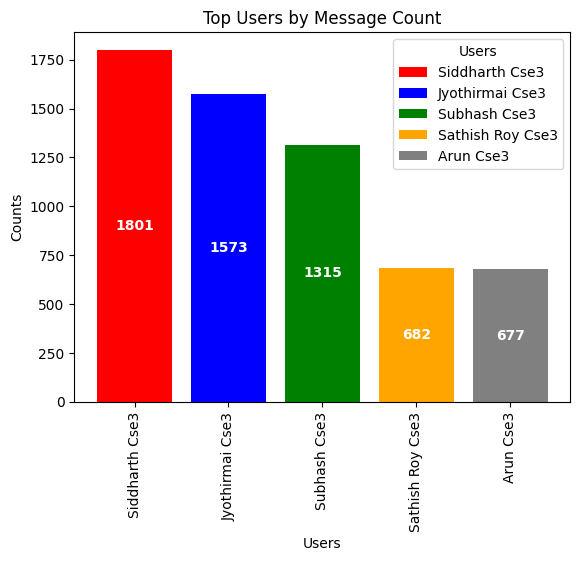

In [ ]:
c = ['red', 'blue', 'green', 'orange', 'grey']
plt.bar(name, count, label=name, color=c)
plt.xticks(rotation='vertical')


for i, (n, c) in enumerate(zip(name, count)):
    plt.text(i, c / 2, str(c), ha='center', va='center', color='white', fontweight='bold')

plt.legend(title='Users')
plt.xlabel('Users')
plt.ylabel('Counts')
plt.title('Top Users by Message Count')
plt.show()

In [ ]:
user_counts = df['user'].value_counts()
total_messages = df.shape[0]

# Calculate the percentage
percentages = round((user_counts / total_messages) * 100, 2).reset_index()
percentages.columns = ['name', 'percent']

print(percentages)

                name  percent
0     Siddharth Cse3    12.89
1    Jyothirmai Cse3    11.26
2       Subhash Cse3     9.41
3   Sathish Roy Cse3     4.88
4          Arun Cse3     4.84
..               ...      ...
57   +91 78424 75440     0.07
58   +91 87925 77354     0.07
59   +91 81791 10788     0.05
60   +91 70750 99781     0.05
61   +91 93909 34512     0.04

[62 rows x 2 columns]


In [ ]:
pip install wordcloud

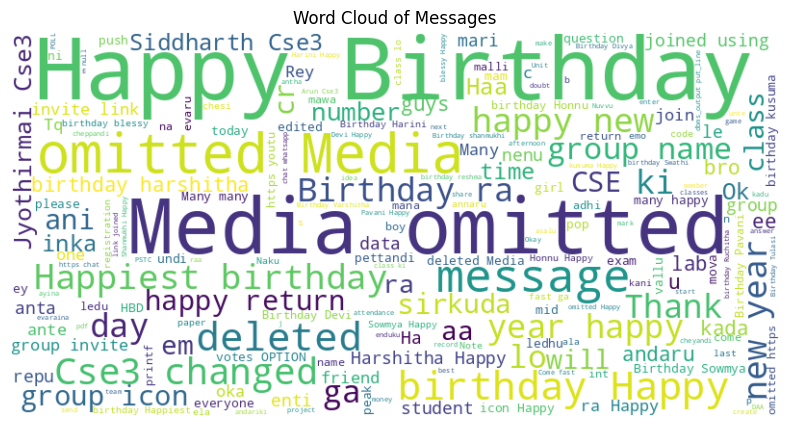

In [ ]:
from wordcloud import WordCloud
text = " ".join(message for message in df['message'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud of Messages')
plt.show()

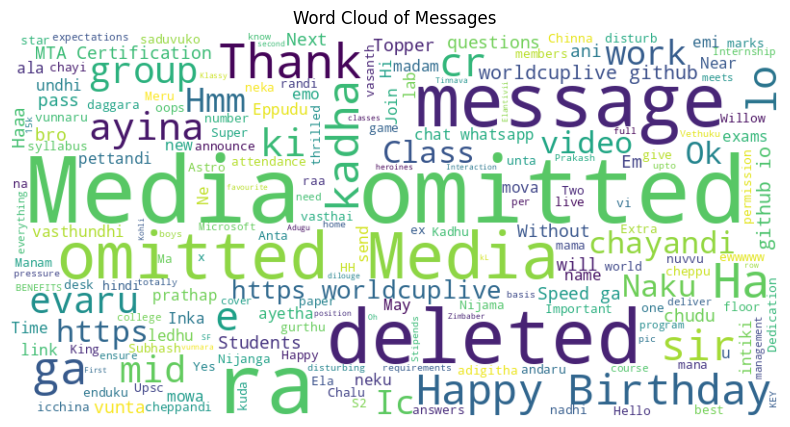

In [ ]:
#individual word cloud
from wordcloud import WordCloud
text = " ".join(message for message in new_df['message'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud of Messages')
plt.show()

In [ ]:
df['user'].unique()

array(['group_notification', 'Karthik Cse3', '+91 99635 37668',
       'Siddharth Cse3', 'Sathish Roy Cse3', 'Jyothirmai Cse3',
       'Bharath Cse3', 'Vikas', 'Harish Cse3', '+91 78424 75440',
       '+91 83743 49561', '+91 63052 32922', 'Subhash Cse3',
       'Rajesh Cse3', 'Syam Cse3', 'Divya Prasad Cse3', 'Vasanth Cse3',
       'Hemanth Cse3', 'Suresh Cse3', '+91 79955 46426', 'Lavanya Cse3',
       'Prakash TopperCse3', 'Harini Chelli', 'Arun Cse3', 'Dileep Cse3',
       'abhiram Cse3', 'Tulasi cse3', 'Narasimha Cse3', '+91 80081 62188',
       'Moksha Cse3', 'Shaahir Cse3', 'Adithya Cse3', '+91 63052 62997',
       '+91 70755 29275', '+91 87908 66264', '+91 83413 81577',
       'Chandhu Cse3', 'Rutesh Cse3', '+91 79934 25684',
       '+91 70750 99781', '+91 62818 42282', '+91 70131 42397',
       'Pavithra Cse3', '+91 63044 38642', '+91 81791 10788',
       'Jasmin Cse3', '+91 96187 75675', 'Munnisha Cse3',
       '+91 79896 93716', '+91 73829 18644', '+91 93909 34512',
       'P

In [ ]:
count_words=[]
for messages in df['message']:
  count_words.extend(messages.split())

In [ ]:
#top twenty words
from collections import Counter
word_counter = Counter(count_words)

# Convert Counter to DataFrame
word_counts_df = pd.DataFrame(list(word_counter.items()), columns=['word', 'count'])
word_counts_df = word_counts_df.sort_values(by='count', ascending=False).reset_index(drop=True)
word_counts_df=word_counts_df.head(20)
# Display the DataFrame
print(word_counts_df)

        word  count
0      Happy   2223
1     <Media   1884
2   omitted>   1884
3   birthday   1413
4   Birthday   1191
5        the   1075
6         to    947
7         ra    564
8         of    562
9    message    538
10       and    495
11       was    486
12   deleted    459
13       you    453
14      This    445
15      this    443
16      Cse3    419
17   changed    418
18        ki    364
19        is    348


<BarContainer object of 20 artists>

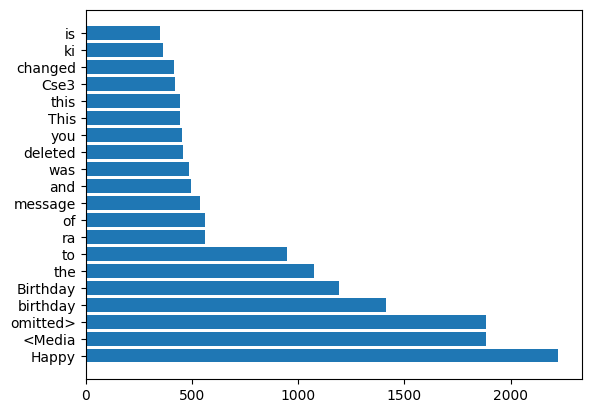

In [ ]:
plt.barh(word_counts_df['word'],word_counts_df['count'])

In [ ]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 7.6 MB/s eta 0:00:00


In [ ]:
import emoji

In [ ]:
emojis = []
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

In [ ]:
emoji_counter = Counter(emojis)

# Convert Counter to DataFrame
emoji_counts_df = pd.DataFrame(list(emoji_counter.items()), columns=['emoji', 'count'])

# Sort the DataFrame by count in descending order
emoji_counts_df = emoji_counts_df.sort_values(by='count', ascending=False).reset_index(drop=True)
emoji_counts_df=emoji_counts_df.head(20)
# Display the DataFrame
print(emoji_counts_df)

   emoji  count
0      🥳   3023
1      🎉    672
2      🎂    619
3      🎊    439
4      🤩    362
5      🔥    360
6      😂    324
7      💥    306
8      ❤    296
9      ✨    284
10     💫    244
11     😅    221
12     🏻    201
13     💖    179
14     😁    169
15     💚    166
16     🥰    165
17     🥲    164
18     💜    159
19     💙    155


<BarContainer object of 20 artists>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 129395 (\N{FACE WITH PARTY HORN AND PARTY HAT}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 127874 (\N{BIRTHDAY CAKE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 127882 (\N{CONFETTI BALL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 129321 (\N{GRINNING FACE WITH STAR EYES}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  func(*args, 

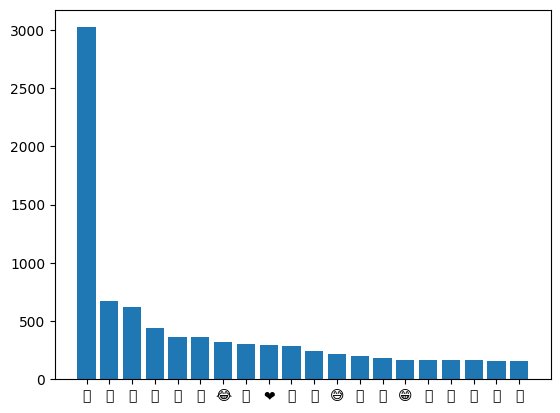

In [ ]:
plt.bar(emoji_counts_df['emoji'],emoji_counts_df['count'])

In [ ]:
df['month_num']=df['date'].dt.month

In [ ]:
timeline = df.groupby(['year', 'month_num', 'month']).count()['message'].reset_index()

# Convert year to int if necessary
timeline['year'] = timeline['year'].astype(int)

# Sort by year and month_num
timeline = timeline.sort_values(by=['year', 'month_num']).reset_index(drop=True)

print(timeline)

    year  month_num      month  message
0   2022          1    January       57
1   2022          2   February      129
2   2022          3      March       24
3   2022          4      April      159
4   2022          5        May      235
5   2022          6       June      101
6   2022          7       July      582
7   2022          8     August       99
8   2022          9  September       89
9   2022         10    October       95
10  2022         11   November      195
11  2022         12   December      294
12  2023          1    January      732
13  2023          2   February      564
14  2023          3      March      459
15  2023          4      April     1157
16  2023          5        May      748
17  2023          6       June     1120
18  2023          7       July      753
19  2023          8     August      711
20  2023          9  September      580
21  2023         10    October     1018
22  2023         11   November      892
23  2023         12   December     1426


In [ ]:
time=[]
for i in range(timeline.shape[0]):
  time.append(timeline['month'][i]+"-"+str(timeline['year'][i]))

In [ ]:
timeline['time']=time
timeline=timeline.head(20)
timeline

,year,month_num,month,message,time
0,2022,1,January,57,January-2022
1,2022,2,February,129,February-2022
2,2022,3,March,24,March-2022
3,2022,4,April,159,April-2022
4,2022,5,May,235,May-2022
5,2022,6,June,101,June-2022
6,2022,7,July,582,July-2022
7,2022,8,August,99,August-2022
8,2022,9,September,89,September-2022
9,2022,10,October,95,October-2022


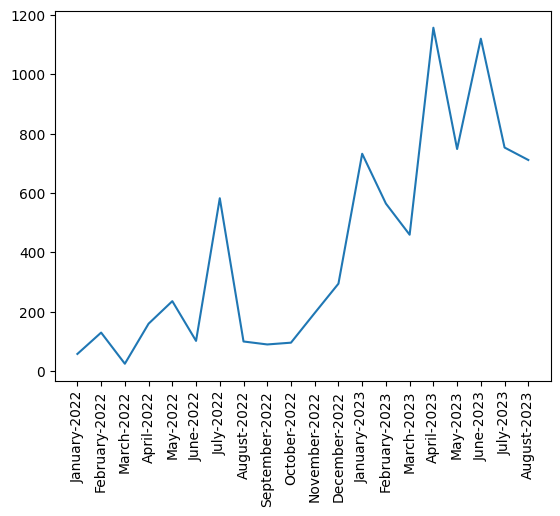

In [ ]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df['only_date']=df['date'].dt.date

In [ ]:
daily_time=df.groupby('only_date').count()['message'].reset_index()
daily_sample=daily_time.head(20)
x=daily_sample.iloc[:,0]
y=daily_sample.iloc[:,-1]
print(x)

0     2022-01-11
1     2022-01-12
2     2022-02-11
3     2022-03-11
4     2022-03-12
5     2022-04-11
6     2022-04-12
7     2022-05-11
8     2022-05-12
9     2022-06-11
10    2022-06-12
11    2022-07-11
12    2022-07-12
13    2022-08-11
14    2022-08-12
15    2022-09-11
16    2022-09-12
17    2022-10-11
18    2022-10-12
19    2022-11-11
Name: only_date, dtype: object


(array([18993., 19024., 19052., 19083., 19113., 19144., 19174., 19205.,
        19236., 19266., 19297.]),
 [Text(18993.0, 0, '2022-01'),
  Text(19024.0, 0, '2022-02'),
  Text(19052.0, 0, '2022-03'),
  Text(19083.0, 0, '2022-04'),
  Text(19113.0, 0, '2022-05'),
  Text(19144.0, 0, '2022-06'),
  Text(19174.0, 0, '2022-07'),
  Text(19205.0, 0, '2022-08'),
  Text(19236.0, 0, '2022-09'),
  Text(19266.0, 0, '2022-10'),
  Text(19297.0, 0, '2022-11')])

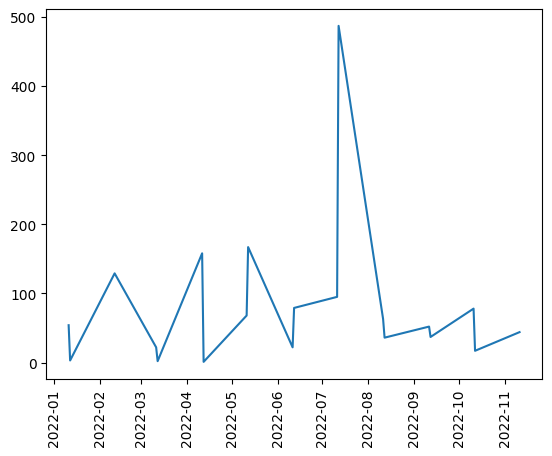

In [ ]:
plt.plot(x,y)
plt.xticks(rotation='vertical')

In [ ]:
df['day_name']=df['date'].dt.day_name()

<BarContainer object of 7 artists>

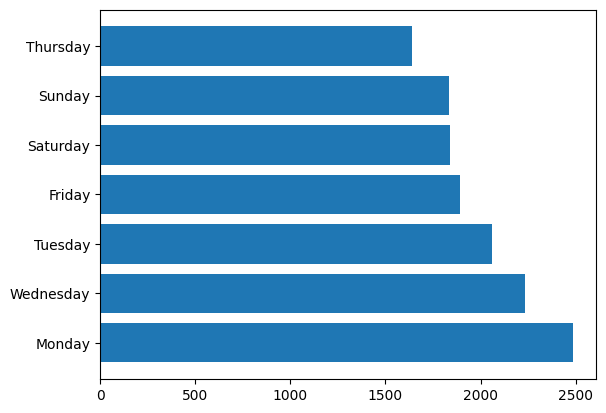

In [ ]:
x=df['day_name'].value_counts()
day=x.index
count=x.values
plt.barh(day,count)

In [ ]:
df['month'] = df['date'].dt.month_name()

<BarContainer object of 12 artists>

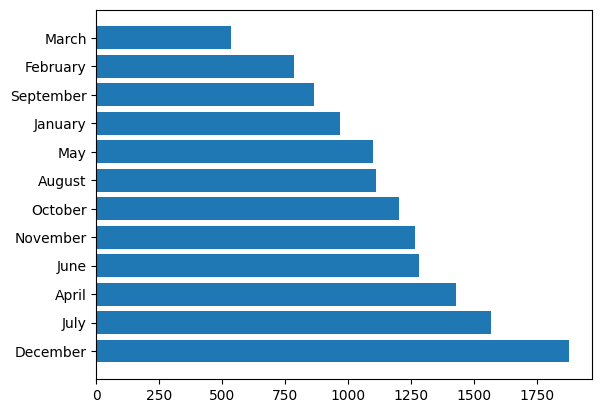

In [ ]:
x=df['month'].value_counts()
month=x.index
count=x.values
plt.barh(month,count)